In [64]:
import pandas as pd
import statsmodels.api as sm
import scipy
import matplotlib.pyplot as plt

# Load data

In [2]:
# Load preprocessed and raw data
df_processed = pd.read_csv('processed_data.csv', sep=';')
df_raw = pd.read_csv('raw_data.csv', sep=';')

In [3]:
# Check shape
print(df_processed.shape)
print(df_raw.shape)

(47766, 204)
(47766, 11)


In [4]:
# Show columns
list(df_processed.columns)

['Duration',
 'Number of ratings',
 'Number of fans',
 'Ratings',
 'Train',
 'Preview',
 'Preview score',
 'Thriller',
 'Horor',
 'Western',
 'Reality-TV',
 'Pornografický',
 'Psychologický',
 'Akční',
 'Film-Noir',
 'Dobrodružný',
 'Erotický',
 'Romantický',
 'Krátkometrážní',
 'Fantasy',
 'Animovaný',
 'Poetický',
 'Rodinný',
 'Hudební',
 'Taneční',
 'Sci-Fi',
 'Road movie',
 'Podobenství',
 'Sportovní',
 'Mysteriózní',
 'Životopisný',
 'IMAX',
 'Experimentální',
 'Loutkový',
 'Pohádka',
 'Povídkový',
 'Krimi',
 'Katastrofický',
 'Muzikál',
 'Komedie',
 'Historický',
 'Válečný',
 'Drama',
 'Talk-show',
 'Hongkong',
 'Sovětský svaz',
 'Thajsko',
 'Chorvatsko',
 'Maďarsko',
 'Vanuatu',
 'Slovensko',
 'Řecko',
 'Východní Německo',
 'Severní Korea',
 'Zambie',
 'Bosna a Hercegovina',
 'Kanada',
 'Bulharsko',
 'Bolívie',
 'Malta',
 'Rusko',
 'Itálie',
 'Ukrajina',
 'Belgie',
 'Malajsie',
 'Ázerbájdžán',
 'Polsko',
 'Brazílie',
 'Jihoafrická republika',
 'Pákistán',
 'Egypt',
 'Čad',
 'Srb

In [5]:
# Check head of processed data
df_processed.head()

,Duration,Number of ratings,Number of fans,Ratings,Train,Preview,Preview score,Thriller,Horor,Western,...,Libanon,Nigérie,Nový Zéland,Litva,Laos,Indie,Mongolsko,Ekvádor,Number of directed movies,Age
0,79,211,1,60.0,1,1,62.552036,0,0,0,...,0,0,0,0,0,0,0,0,0.0,14
1,110,84,0,70.0,1,1,69.457848,0,0,0,...,0,0,0,0,0,0,0,0,0.0,23
2,93,56,0,57.0,1,1,55.448444,0,0,0,...,0,0,0,0,0,0,0,0,0.0,28
3,69,532,0,78.0,1,1,65.276527,0,0,0,...,0,0,0,0,0,0,0,0,0.0,84
4,72,53,0,62.0,1,1,67.759979,0,1,0,...,0,0,0,0,0,0,0,0,1.0,83


In [6]:
# Check head of raw data
df_raw.head()

,Genres,Country,Year,Duration,Director,Number of ratings,Number of fans,Ratings,Train,Preview,Preview score
0,"('Drama', 'Krimi')","('USA',)",1994,142,Frank Darabont,112108,17066,95.0,1,1,75.784462
1,"('Drama', 'Komedie', 'Romantický')","('USA',)",1994,142,Robert Zemeckis,127493,17945,94.0,1,1,79.378052
2,"('Drama', 'Mysteriózní', 'Krimi')","('USA',)",1999,188,Frank Darabont,108491,7756,93.0,1,1,79.458504
3,"('Drama',)","('USA',)",1975,133,Miloš Forman,80693,4689,92.0,1,1,80.438774
4,"('Thriller', 'Krimi', 'Mysteriózní', 'Psycholo...","('USA',)",1995,127,David Fincher,97799,6061,92.0,1,1,77.277603


In [7]:
# Check summary of numerical variables in raw data
num_vars = ['Duration', 'Number of directed movies', 'Age', 'Preview score', 'Preview', 'Number of ratings', 'Number of fans']
df_processed[num_vars + ['Ratings']].describe()

,Duration,Number of directed movies,Age,Preview score,Preview,Number of ratings,Number of fans,Ratings
count,47766.000000,47766.000000,47766.000000,47766.000000,47766.000000,47766.000000,47766.000000,47766.000000
mean,100.163903,3.275614,26.128208,60.766139,0.931227,1868.056086,19.562722,60.103965
std,30.861669,5.641401,22.047621,11.638095,0.253070,6389.845308,224.642112,14.637676
min,60.000000,0.000000,0.000000,9.427992,0.000000,20.000000,0.000000,1.000000
25%,89.000000,0.000000,9.000000,55.617115,1.000000,49.000000,0.000000,52.000000
50%,96.000000,1.000000,19.000000,62.612677,1.000000,145.000000,0.000000,62.000000
75%,108.000000,4.000000,39.000000,69.348896,1.000000,677.000000,2.000000,71.000000
max,5220.000000,75.000000,117.000000,81.104698,1.000000,127493.000000,17945.000000,97.000000


# Inspect genres

In [8]:
# Convert strings to sets
df_raw['Genres'] = df_raw['Genres'].apply(lambda x: set(eval(x)))

In [9]:
# Get value counts
df_raw['Genres'].value_counts().head(15)

Genres
{Drama}                         6822
{Komedie}                       3669
{Drama, Komedie}                1970
{Horor}                         1525
{Drama, Romantický}             1369
{Komedie, Romantický}           1175
{Thriller, Horor}               1005
{Komedie, Drama, Romantický}     900
{Thriller}                       893
{Thriller, Drama}                782
{Akční}                          662
{Krimi, Drama}                   616
{Thriller, Krimi, Drama}         568
{Válečný, Drama}                 555
{Western}                        454
Name: count, dtype: int64

In [10]:
# Find all unique genres
genres = set()
for idx in range(df_raw.shape[0]):
    genres = genres | df_raw.loc[idx, 'Genres']
print(f'Total unique genres: {len(genres)}')

Total unique genres: 37


In [11]:
# Get value counts of individual genres
genre_counts = df_processed[list(genres)].sum(axis=0).sort_values(ascending=False)
genre_counts

Drama             24092
Komedie           14210
Thriller           9218
Akční              7116
Horor              6466
Romantický         6365
Krimi              5186
Dobrodružný        4380
Sci-Fi             3186
Rodinný            2954
Mysteriózní        2691
Fantasy            2618
Animovaný          2031
Válečný            1836
Historický         1488
Životopisný        1294
Western            1027
Pornografický       825
Hudební             819
Muzikál             737
Sportovní           703
Psychologický       632
Povídkový           309
Film-Noir           295
Road movie          243
Pohádka             226
Erotický            142
Poetický            125
Katastrofický       102
Experimentální       79
Podobenství          73
Taneční              51
Loutkový             40
Reality-TV            4
IMAX                  3
Talk-show             1
Krátkometrážní        1
dtype: int64

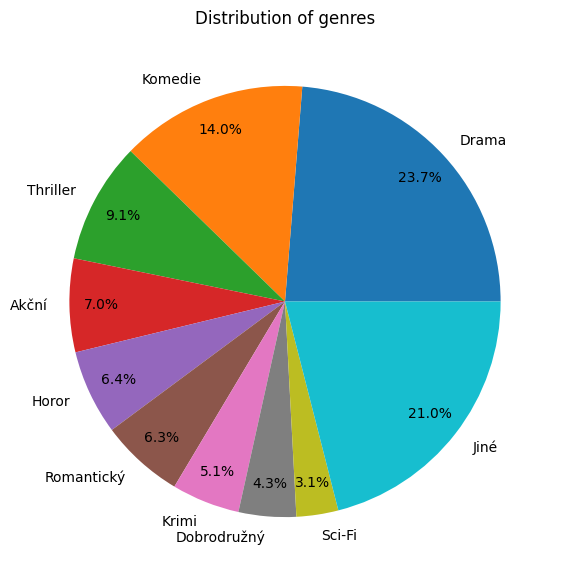

In [12]:
# Plot value counts of individual genres
def plot_pie(data, num_show, title):
    pie_data = data.iloc[:num_show].copy()
    pie_data['Jiné'] = data.iloc[num_show:].sum()
    pie_data.plot.pie(autopct='%1.1f%%', figsize=(7,7), pctdistance=0.85, title=title)
plot_pie(genre_counts, 9, 'Distribution of genres')

In [49]:
# Get average ratings across genres
genres_avg_ratings = {}
for genre in genres:
    genre_ratings = {}
    genre_ratings['Average ratings'] = (df_processed[genre] * df_processed['Ratings']).sum() / df_processed[genre].sum()
    genre_ratings['Count'] = df_processed[genre].sum()
    genres_avg_ratings[genre] = genre_ratings
genres_avg_ratings = pd.DataFrame(genres_avg_ratings).T
genres_avg_ratings.loc[genres_avg_ratings['Count'] >= 50, :].sort_values('Average ratings', ascending=False).head(10)

,Average ratings,Count
Film-Noir,71.718644,295.0
Životopisný,69.040958,1294.0
Podobenství,68.849315,73.0
Poetický,67.912000,125.0
Road movie,67.679012,243.0
Historický,67.434812,1488.0
Válečný,66.391612,1836.0
Hudební,65.683761,819.0
Animovaný,65.514032,2031.0
Western,65.077897,1027.0


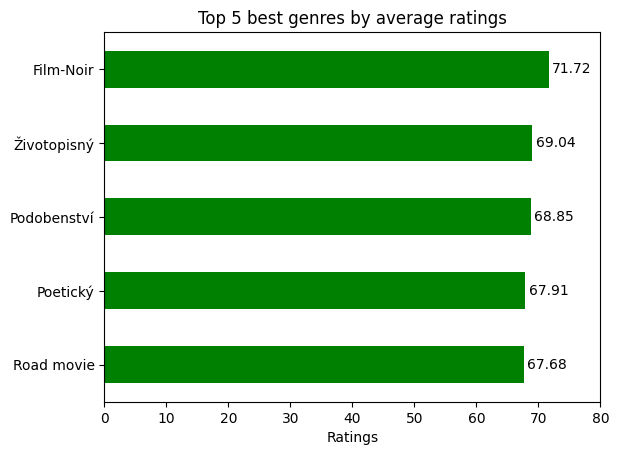

In [73]:
# Plot average ratings across genres (best)
best_genres = genres_avg_ratings.loc[genres_avg_ratings['Count'] >= 50, :].sort_values('Average ratings').tail(5)
best_genres['Average ratings'].plot.barh(title='Top 5 best genres by average ratings', color='green', xlim=(0, 80), xlabel='Ratings')
for ind in range(best_genres.shape[0]):
    plt.text(best_genres['Average ratings'].iloc[ind]+0.5, ind, str(round(best_genres['Average ratings'].iloc[ind], 2)), va='center')

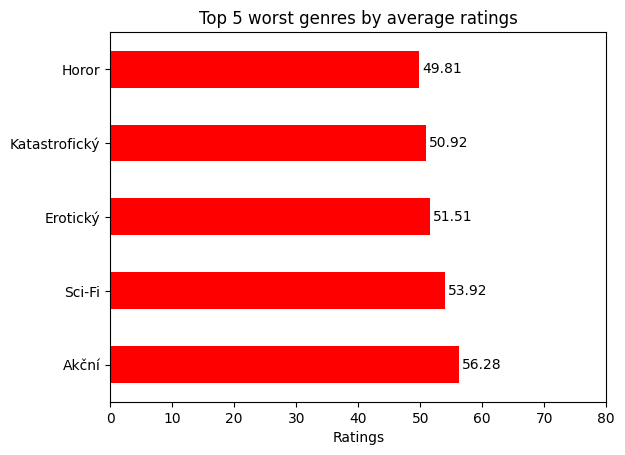

In [75]:
# Plot average ratings across genres (worst)
worst_genres = genres_avg_ratings.loc[genres_avg_ratings['Count'] >= 50, :].sort_values('Average ratings', ascending=False).tail(5)
worst_genres['Average ratings'].plot.barh(title='Top 5 worst genres by average ratings', color='red', xlim=(0, 80), xlabel='Ratings')
for ind in range(worst_genres.shape[0]):
    plt.text(worst_genres['Average ratings'].iloc[ind]+0.5, ind, str(round(worst_genres['Average ratings'].iloc[ind], 2)), va='center')

# Inspect country

In [13]:
# Convert strings to sets
df_raw['Country'] = df_raw['Country'].apply(lambda x: set(eval(x)))

In [14]:
# Get value counts
df_raw['Country'].value_counts().head(15)

Country
{USA}                    17676
{Francie}                 2144
{Velká Británie}          2085
{Československo}          1755
{Japonsko}                1706
{Itálie}                  1222
{Kanada}                   910
{Jižní Korea}              861
{USA, Velká Británie}      738
{Německo}                  707
{Francie, Itálie}          678
{Španělsko}                647
{Indie}                    590
{Česko}                    576
{Hongkong}                 573
Name: count, dtype: int64

In [15]:
# Find all unique countries
countries = set()
for idx in range(df_raw.shape[0]):
    countries = countries | df_raw.loc[idx, 'Country']
print(f'Total unique countries: {len(countries)}')
countries.remove('Angola') # Disregard removed country

Total unique countries: 159


In [16]:
# Get value counts of individual countries
country_counts = df_processed[list(countries)].sum(axis=0).sort_values(ascending=False)
country_counts

USA               21727
Francie            5612
Velká Británie     4421
Itálie             3070
Německo            2434
                  ...  
Kongo                 1
Namibie               1
Vanuatu               1
Mauricius             1
Gabon                 1
Length: 158, dtype: int64

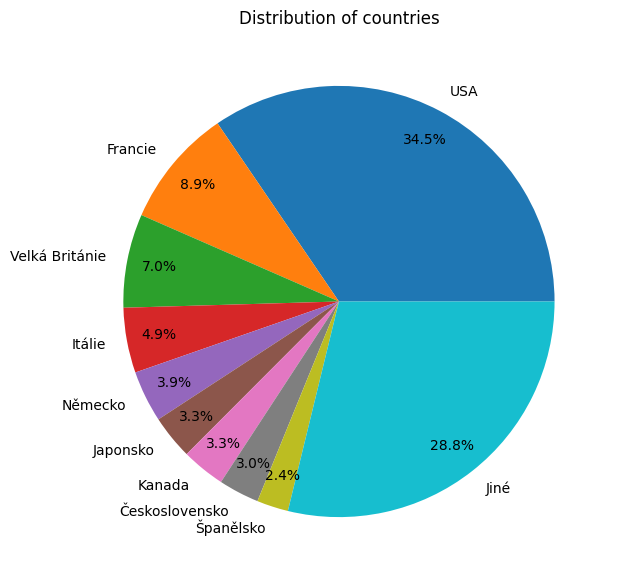

In [17]:
# Plot value counts of individual countries
plot_pie(country_counts, 9, 'Distribution of countries')

In [76]:
# Get average ratings across countries
countries_avg_ratings = {}
for country in countries:
    country_ratings = {}
    country_ratings['Average ratings'] = (df_processed[country] * df_processed['Ratings']).sum() / df_processed[country].sum()
    country_ratings['Count'] = df_processed[country].sum()
    countries_avg_ratings[country] = country_ratings
countries_avg_ratings = pd.DataFrame(countries_avg_ratings).T#.sort_values(ascending=False)
countries_avg_ratings.loc[countries_avg_ratings['Count'] >= 50, :].sort_values('Average ratings', ascending=False).head(10)

,Average ratings,Count
Německá říše,72.848000,125.0
Sovětský svaz,68.809886,526.0
Jugoslávie,68.588571,175.0
Írán,68.222222,135.0
Japonsko,67.948607,2082.0
Západní Německo,66.956461,712.0
Chorvatsko,66.800000,115.0
Tchaj-wan,66.440678,177.0
Švédsko,66.285714,742.0
Polsko,66.158915,774.0


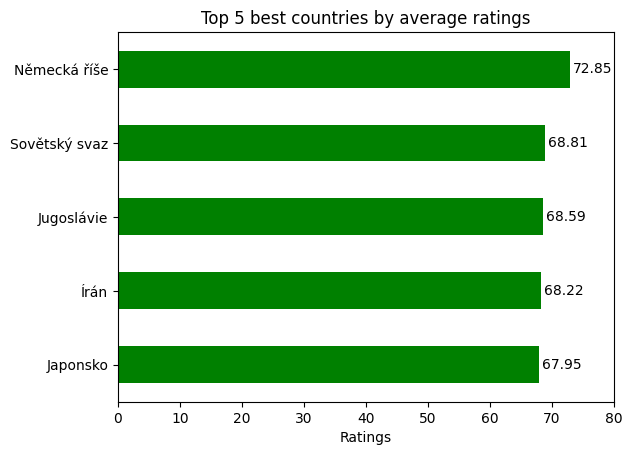

In [77]:
# Plot average ratings across countries (best)
best_countries = countries_avg_ratings.loc[countries_avg_ratings['Count'] >= 50, :].sort_values('Average ratings').tail(5)
best_countries['Average ratings'].plot.barh(title='Top 5 best countries by average ratings', color='green', xlim=(0, 80), xlabel='Ratings')
for ind in range(best_countries.shape[0]):
    plt.text(best_countries['Average ratings'].iloc[ind]+0.5, ind, str(round(best_countries['Average ratings'].iloc[ind], 2)), va='center')

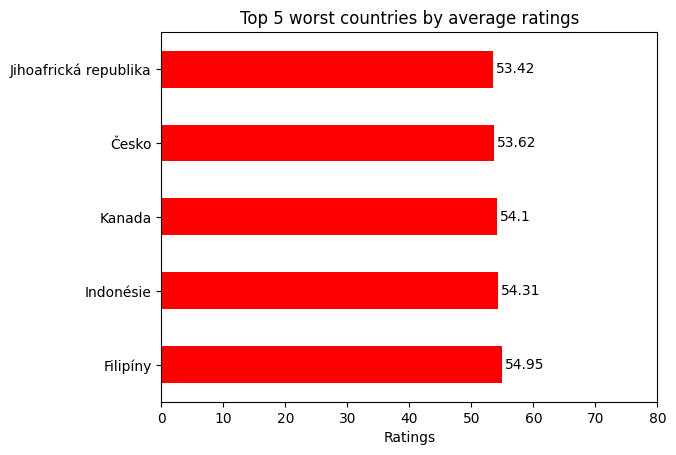

In [79]:
# Plot average ratings across countries (worst)
worst_countries = countries_avg_ratings.loc[countries_avg_ratings['Count'] >= 50, :].sort_values('Average ratings', ascending=False).tail(5)
worst_countries['Average ratings'].plot.barh(title='Top 5 worst countries by average ratings', color='red', xlim=(0, 80), xlabel='Ratings')
for ind in range(worst_countries.shape[0]):
    plt.text(worst_countries['Average ratings'].iloc[ind]+0.5, ind, str(round(worst_countries['Average ratings'].iloc[ind], 2)), va='center')

# Inspect year

In [18]:
# Get year counts
year_counts = df_raw['Year'].value_counts().sort_index()
year_counts

Year
1906       1
1911       2
1912       1
1913       7
1914       6
        ... 
2019    1317
2020    1041
2021    1050
2022    1169
2023     826
Name: count, Length: 114, dtype: int64

In [19]:
# Check most prolific years
year_counts.sort_values(ascending=False).head(15)

Year
2009    1414
2017    1366
2018    1360
2008    1354
2016    1352
2015    1350
2014    1338
2019    1317
2013    1316
2010    1312
2007    1309
2012    1300
2006    1267
2011    1254
2022    1169
Name: count, dtype: int64

<Axes: title={'center': 'Number of movies over time'}, xlabel='Year', ylabel='Number of movies'>

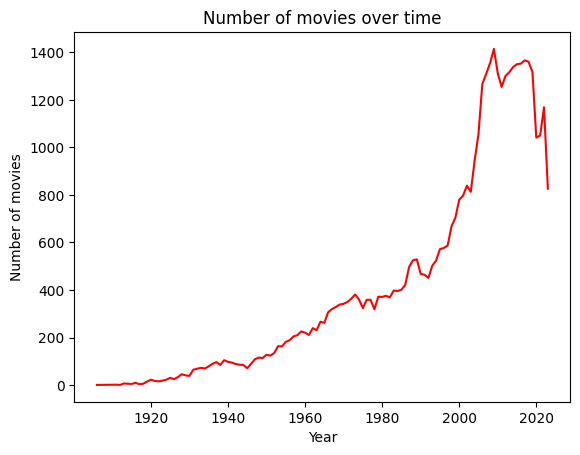

In [80]:
# Plot year counts
year_counts.plot(title='Number of movies over time', ylabel='Number of movies', color='red')

<Axes: title={'center': 'Average ratings across years'}, xlabel='Year', ylabel='Average rating'>

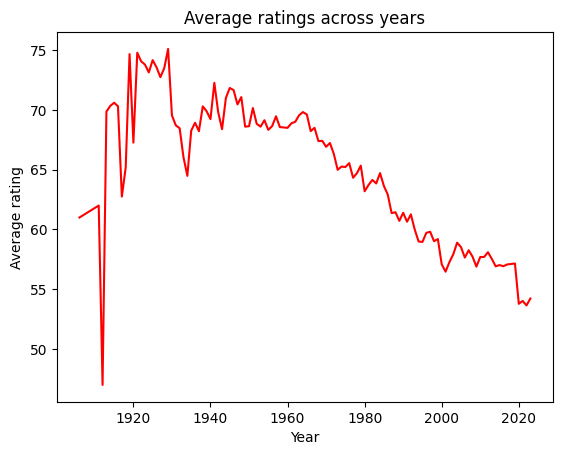

In [81]:
# Plot average ratings across years
df_raw.groupby('Year')['Ratings'].mean().plot(title='Average ratings across years', ylabel='Average rating', color='red')

# Inspect duration

In [21]:
# Get duration counts
duration_counts = df_processed['Duration'].value_counts().sort_index()
duration_counts.drop(5220, inplace=True)
duration_counts

Duration
60     103
61      39
62      44
63      61
64      48
      ... 
445      1
450      1
485      1
489      1
729      1
Name: count, Length: 222, dtype: int64

In [22]:
# Find outliers
out_mask = (scipy.stats.zscore(df_processed['Duration']).abs() <= 3).values
print(f'Total Duration outliers: {sum(~out_mask)}')

Total Duration outliers: 166


<Axes: >

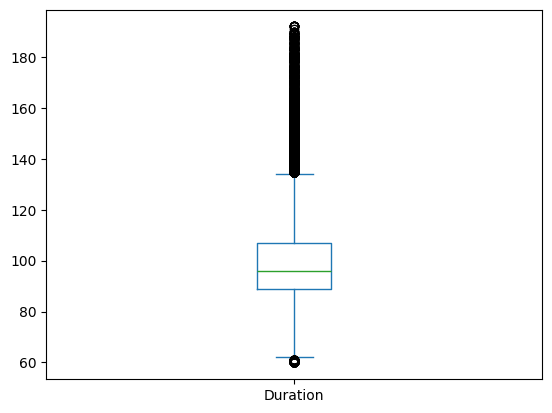

In [23]:
# Plot boxplot of duration
df_processed.loc[out_mask, 'Duration'].plot.box()

In [24]:
# Show the new maximum value
df_processed.loc[out_mask, 'Duration'].max()

192

<Axes: title={'center': 'Histogram of Duration'}, xlabel='Duration (in mins)', ylabel='Frequency'>

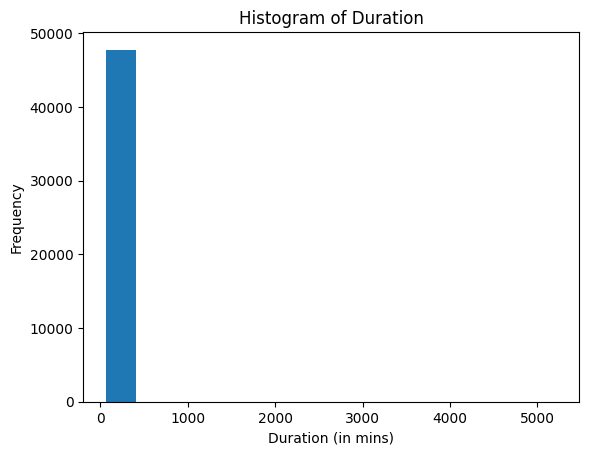

In [94]:
# Plot histogram of duration (with outliers)
df_processed['Duration'].plot.hist(title='Histogram of Duration', bins=15, xlabel='Duration (in mins)')

<Axes: title={'center': 'Histogram of duration (no outliers)'}, xlabel='Duration (in mins)', ylabel='Frequency'>

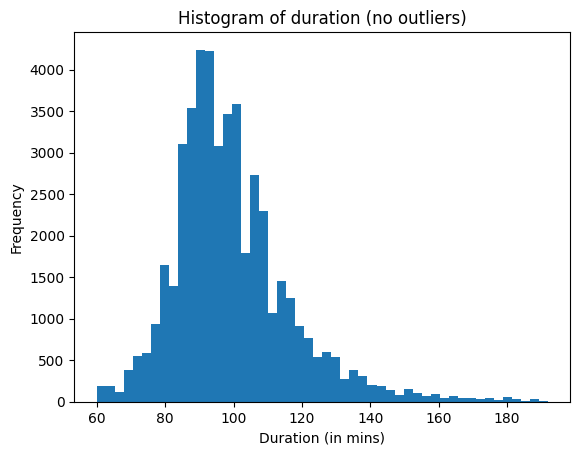

In [96]:
# Plot histogram of duration
df_processed.loc[out_mask, 'Duration'].plot.hist(title='Histogram of duration (no outliers)', bins=50, xlabel='Duration (in mins)')

# Inspect directors

In [26]:
# Find number of unique directors
df_raw['Director'].nunique()

18580

In [27]:
# Get the number of NaNs
df_raw['Director'].isna().sum()

46

In [28]:
# Find most reoccurring directors
df_raw['Director'].value_counts(dropna=False).head(15)

Director
Martin Frič           76
Alfred Hitchcock      53
Fred Olen Ray         49
Woody Allen           49
Miroslav Cikán        48
Jesús Franco          47
NaN                   46
Jim Wynorski          46
Claude Chabrol        46
Takaši Miike          45
Joe D'Amato           44
Michael Curtiz        44
Otakar Vávra          43
Robby D.              43
Vladimír Slavínský    42
Name: count, dtype: int64

In [87]:
# Check outliers
out_mask_dir = (scipy.stats.zscore(df_processed['Number of directed movies']).abs() <= 3).values
print(f'Total Number of directed movies outliers: {sum(~out_mask_dir)}')

Total Number of directed movies outliers: 1013


<Axes: ylabel='Frequency'>

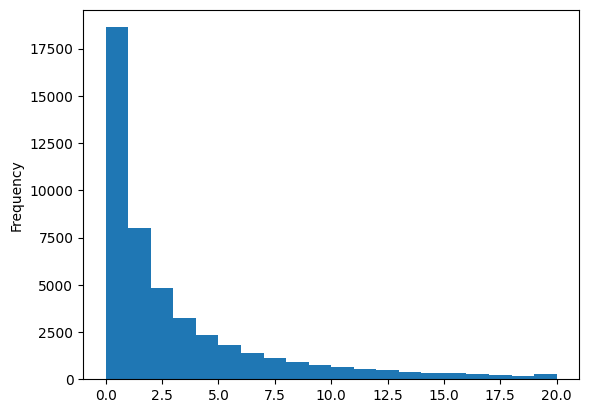

In [91]:
# Inspect histrogram of directed movies
df_processed.loc[out_mask_dir, 'Number of directed movies'].plot.hist(bins=20)

# Inspect ratings

<Axes: title={'center': 'Histogram of Ratings'}, ylabel='Frequency'>

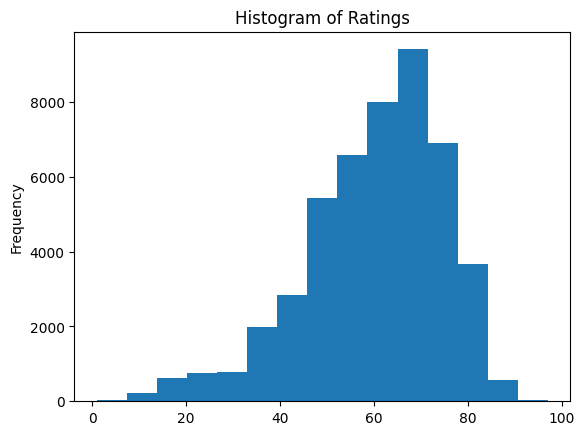

In [97]:
# Show histogram of ratings
df_processed['Ratings'].plot.hist(title='Histogram of Ratings', bins=15)

In [98]:
# Describe ratings
df_processed['Ratings'].describe()

count    47766.000000
mean        60.103965
std         14.637676
min          1.000000
25%         52.000000
50%         62.000000
75%         71.000000
max         97.000000
Name: Ratings, dtype: float64

<Axes: title={'center': 'Histogram of preview score'}, ylabel='Frequency'>

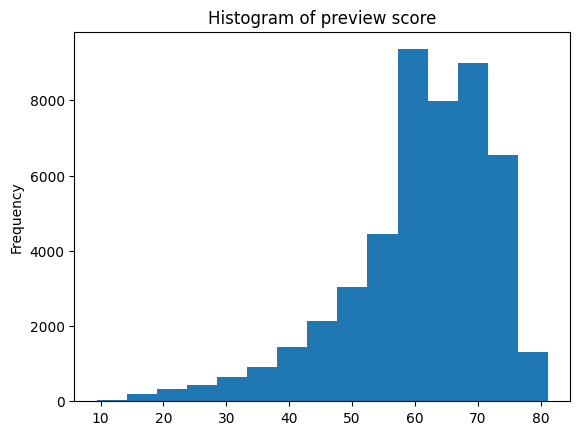

In [30]:
# Show histogram of preview score
df_processed['Preview score'].plot.hist(title='Histogram of preview score', bins=15)

In [34]:
# Get average ratings by director
dir_avg_ratings = df_raw.groupby('Director')['Ratings'].agg(['mean', 'count']).sort_values('mean', ascending=False)
dir_avg_ratings[dir_avg_ratings['count'] >= 3].head(10)

,mean,count
Director,,
Ladislav Smoljak,85.800000,5
Sohrab Shahid Saless,85.000000,3
Frank Darabont,84.750000,4
Tomm Moore,84.666667,3
Gábor Bódy,84.333333,3
René Goscinny,84.250000,4
Christopher Nolan,84.083333,12
Karel Zeman,83.700000,10
Agasij Babajan,83.666667,3


# Inspect correlations

In [35]:
# Define a function calculating and adjusting the correlation matrix
def get_correlations(df):
    corr_mat = df.corr().stack().reset_index()
    corr_mat.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION'] # Rename the columns
    mask_dups = (corr_mat[['FEATURE_1', 'FEATURE_2']].apply(frozenset, axis=1).duplicated()) | (corr_mat['FEATURE_1']==corr_mat['FEATURE_2']) # Create a mask to identify rows with duplicate features
    corr_mat = corr_mat[~mask_dups]
    corr_mat = corr_mat.iloc[(-corr_mat['CORRELATION'].abs()).argsort().values, :]

    return corr_mat

In [36]:
# Get correlation matrix for numerical variables
corr_mat_num_vars = get_correlations(df_processed[num_vars +  ['Ratings']])
corr_mat_num_vars

,FEATURE_1,FEATURE_2,CORRELATION
31,Preview score,Ratings,0.734685
46,Number of ratings,Number of fans,0.615692
23,Age,Ratings,0.303175
19,Age,Preview score,0.240072
47,Number of ratings,Ratings,0.196923
7,Duration,Ratings,0.188588
10,Number of directed movies,Age,0.188017
29,Preview score,Number of ratings,0.160534
3,Duration,Preview score,0.142681
55,Number of fans,Ratings,0.125028


In [37]:
# Get correlation matrix for categorical variables
cat_vars = list(set(df_processed.columns)- set(num_vars) - set(['Ratings', 'Train']))
cor_mat_cat_vars = get_correlations(df_processed[cat_vars + ['Ratings']])
cor_mat_cat_vars.head(20)

,FEATURE_1,FEATURE_2,CORRELATION
9313,Tádžikistán,Uzbekistán,0.707099
12909,Česko,Slovensko,0.364932
28609,Animovaný,Rodinný,0.331427
12490,Somálsko,Keňa,0.316198
2743,Drama,Ratings,0.297800
15028,Slovinsko,Chorvatsko,0.290505
397,Kostarika,Nikaragua,0.288627
16830,Burkina Faso,Mali,0.288624
17932,Hongkong,Čína,0.278567
4899,Horor,Ratings,-0.278208


# Linear regression

In [38]:
# Define a function estimating a model and showing results
def OLS(vars, mask = None, plot_title = ''):
    # Create mask if not provided
    if mask is None:
        mask = [True] * df_processed.shape[0]

    # Specify the model
    model = sm.OLS(df_processed.loc[mask, 'Ratings'], sm.add_constant(df_processed.loc[mask, vars]))
    model_res = model.fit()

    # Print summary
    print(model_res.summary())
    print('\n')

    # Show residual plot
    model_res.resid.plot(style='.', title=plot_title)

    # Show MSE and MAE
    print(f'MAE: {model_res.resid.abs().mean()}')
    print(f'MSE: {(model_res.resid ** 2).mean()}')

    # Show pvalues
    print('\np-values:')
    print(model_res.pvalues.sort_values())

    return model_res

### Simple model

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     2438.
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        18:14:40   Log-Likelihood:            -1.9256e+05
No. Observations:               47766   AIC:                         3.851e+05
Df Residuals:                   47762   BIC:                         3.852e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

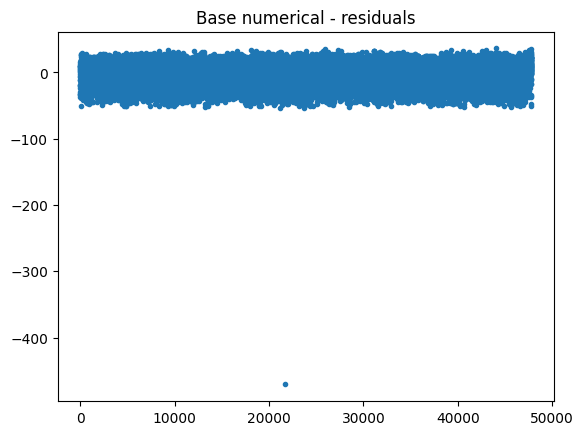

In [39]:
# Estimate a model with only basic numerical variables
base_num_vars = ['Duration', 'Number of directed movies', 'Age']
base_num_model = OLS(base_num_vars, plot_title='Base numerical - residuals')

### Simple model - no outliers

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     3956.
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        18:14:40   Log-Likelihood:            -1.8995e+05
No. Observations:               47600   AIC:                         3.799e+05
Df Residuals:                   47596   BIC:                         3.799e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

MAE: 10.146946116164978
MSE: 171.26654987331867

p-values:
const                        0.000000
Duration                     0.000000
Age                          0.000000
Number of directed movies    0.000002
dtype: float64


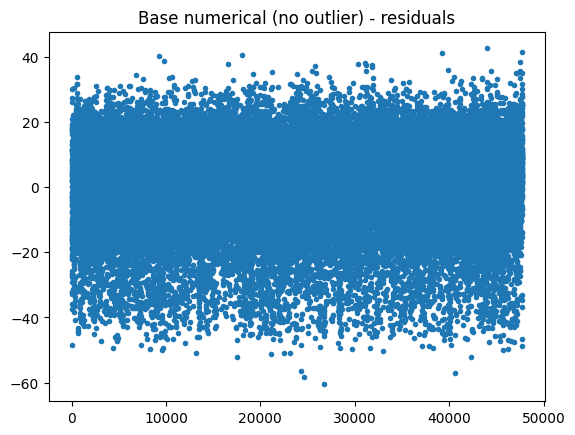

In [40]:
# Estimate a regression for base numerical variables only (without Duration outliers)
base_num_no_out_model = OLS(base_num_vars, out_mask, 'Base numerical (no outlier) - residuals')

### Ex post model - no out

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     2782.
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        20:55:32   Log-Likelihood:            -1.8914e+05
No. Observations:               47600   AIC:                         3.783e+05
Df Residuals:                   47594   BIC:                         3.784e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

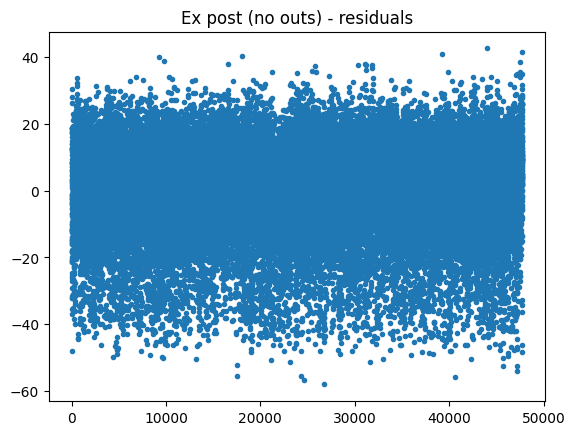

In [102]:
# Estimate a regression for all numerical variables (no Duration outliers)
ex_post_model = OLS(['Duration', 'Number of directed movies', 'Age', 'Number of ratings', 'Number of fans'], out_mask, 'Ex post (no outs) - residuals')

### Basic numerical variables + categorical variables (main model)

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     145.6
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        21:06:55   Log-Likelihood:            -1.8394e+05
No. Observations:               47600   AIC:                         3.683e+05
Df Residuals:                   47401   BIC:                         3.700e+05
Df Model:                         198                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

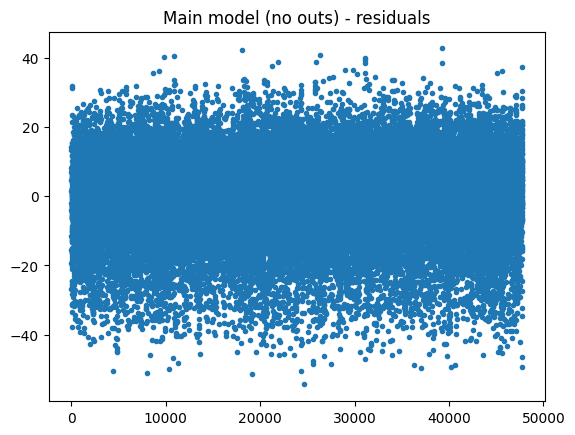

In [104]:
# Estimate a regression with basic numerical variables, categorical variables, and preview score
main_model = OLS(base_num_vars + cat_vars, out_mask, 'Main model (no outs) - residuals')

In [105]:
# Check interesting p-values
main_model_pvals_params = pd.concat([main_model.params, main_model.pvalues], axis=1)
main_model_pvals_params.columns = ['Coef', 'p-val']
main_model_pvals_params.sort_values('p-val').head(20)

,Coef,p-val
const,29.565031,0.000000e+00
Duration,0.213802,0.000000e+00
Age,0.239555,0.000000e+00
Drama,5.410804,0.000000e+00
Animovaný,12.546862,0.000000e+00
Horor,-5.220820,4.007252e-181
USA,-3.254138,2.848190e-103
Československo,-6.496604,4.773403e-88
Komedie,2.522697,1.864436e-77
Akční,-2.926285,5.362880e-65


### All variables

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     178.8
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        21:23:58   Log-Likelihood:            -1.8187e+05
No. Observations:               47600   AIC:                         3.641e+05
Df Residuals:                   47399   BIC:                         3.659e+05
Df Model:                         200                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

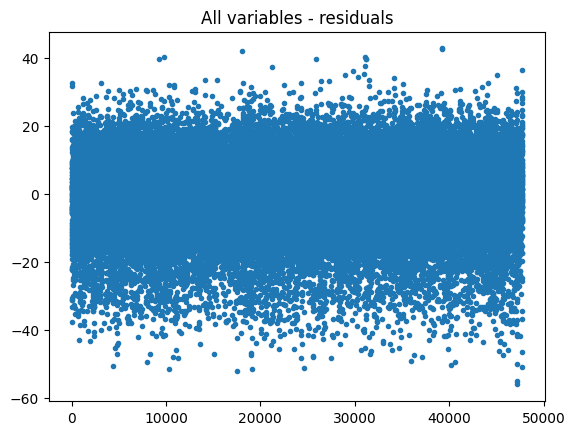

In [113]:
# Estimate a regression with basic numerical variables and categorical variables
all_model = OLS(['Duration', 'Number of directed movies', 'Age', 'Number of ratings', 'Number of fans'] + cat_vars, out_mask, 'All variables - residuals')

# Language model

In [114]:
# Store results of training
training_loss = [213.2171, 184.7769, 183.6691, 182.8921, 182.0245, 163.4424, 133.0735, 108.8639, 84.3911, 64.6561]
test_loss = [176.7717, 176.8555, 172.8473, 170.2766, 173.2945, 180.7531, 145.6491, 149.0289, 142.6174, 145.7683]

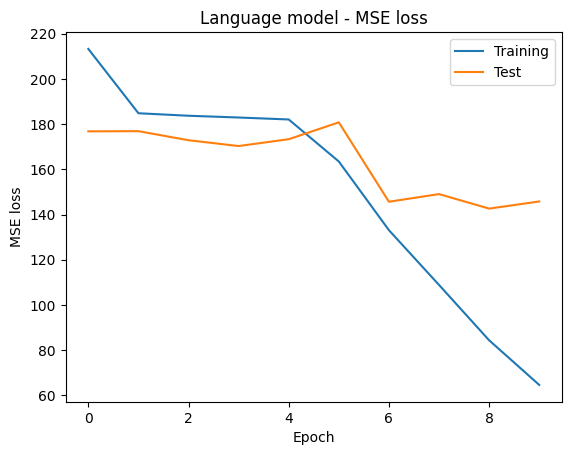

In [117]:
# Plot loss
plt.plot(training_loss, label='Training')
plt.plot(test_loss, label='Test')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.title('Language model - MSE loss')
plt.legend()

In [118]:
# Store MAE
train_MAE = [11.2482, 10.6462, 10.6155, 10.5959, 10.5575, 9.9589, 8.9795, 8.1257, 7.1947, 6.3109]
test_MAE = [10.2332, 10.1446, 10.1174, 10.083, 10.0816, 10.7983, 9.237, 9.2641, 9.1613, 9.2448]

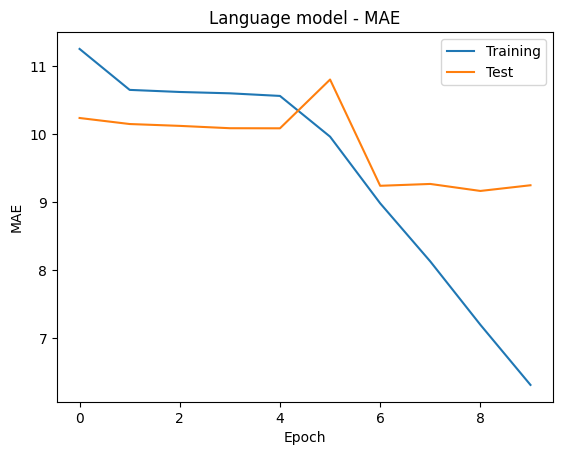

In [119]:
# Plot MAE
plt.plot(train_MAE, label='Training')
plt.plot(test_MAE, label='Test')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Language model - MAE')
plt.legend()

### Basic numerical variables + categorical variables + preview score

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     412.0
Date:                Mon, 20 May 2024   Prob (F-statistic):               0.00
Time:                        23:05:16   Log-Likelihood:            -1.7135e+05
No. Observations:               47600   AIC:                         3.431e+05
Df Residuals:                   47400   BIC:                         3.448e+05
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

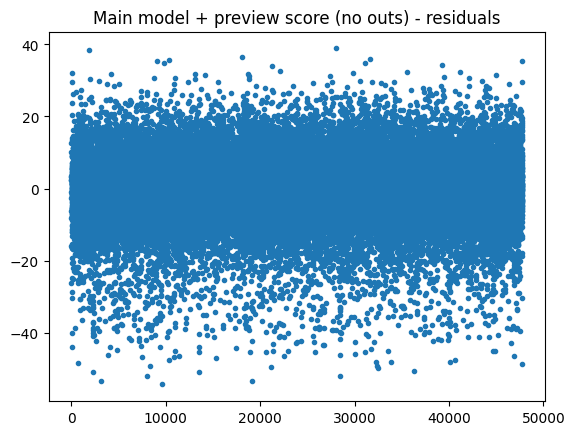

In [120]:
# Estimate a regression with basic numerical variables, categorical variables, and preview score
main_model_preview = OLS(base_num_vars + ['Preview score'] + cat_vars, out_mask, 'Main model + preview score (no outs) - residuals')

In [ ]:
# Check interesting p-values
main_model_pvals_params = pd.concat([main_model.params, main_model.pvalues], axis=1)
main_model_pvals_params.columns = ['Coef', 'p-val']
main_model_pvals_params.sort_values('p-val').head(20)

,Coef,p-val
const,29.565031,0.000000e+00
Duration,0.213802,0.000000e+00
Age,0.239555,0.000000e+00
Drama,5.410804,0.000000e+00
Animovaný,12.546862,0.000000e+00
Horor,-5.220820,4.007252e-181
USA,-3.254138,2.848190e-103
Československo,-6.496604,4.773403e-88
Komedie,2.522697,1.864436e-77
Akční,-2.926285,5.362880e-65
